# HW 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
C = 1.0
svc = svm.SVC(kernel = 'linear', C=1).fit(X,y)

In [4]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

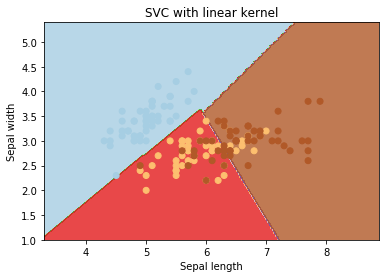

In [5]:
plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.8)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


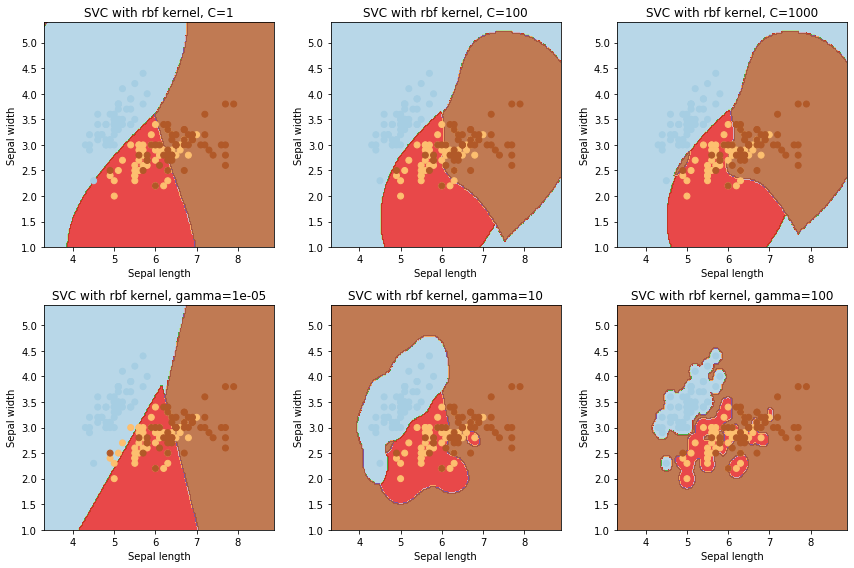

In [6]:
C_grid = [1, 100, 1000]
gamma_grid = [1e-5, 10, 100]
tuned = ['C', 'gamma']
f, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    if not i:
        for idx1, C in enumerate(C_grid):
            svc = svm.SVC(C=C, kernel='rbf').fit(X, y)
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[0][idx1].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
            axes[0][idx1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
            axes[0][idx1].set_xlabel('Sepal length')
            axes[0][idx1].set_ylabel('Sepal width')
            axes[0][idx1].set_title(f"SVC with rbf kernel, C={C}")
    else:
        for idx2, gamma in enumerate(gamma_grid):
            svc = svm.SVC(gamma=gamma, kernel='rbf').fit(X, y)
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[1][idx2].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
            axes[1][idx2].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
            axes[1][idx2].set_xlabel('Sepal length')
            axes[1][idx2].set_ylabel('Sepal width')
            axes[1][idx2].set_title(f"SVC with rbf kernel, gamma={gamma}")
            
f.tight_layout();

# HW2

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights = [0.99], flip_y=0,
                          random_state=4)

Counter({0: 9900, 1: 100})


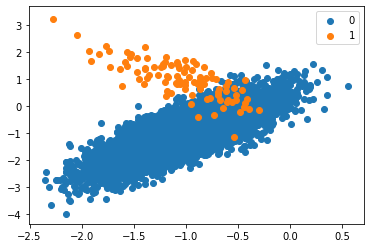

In [11]:
from collections import Counter
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = svm.SVC(gamma='scale')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.804


In [13]:
model = svm.SVC(gamma='scale', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.964


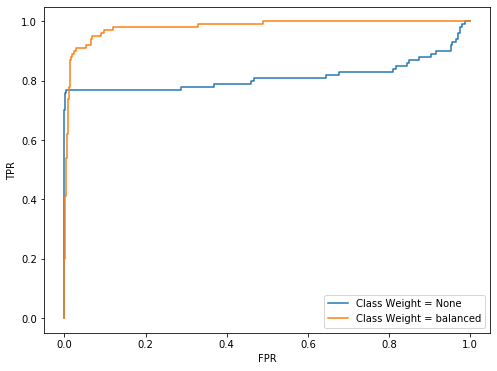

In [15]:
from sklearn.metrics import roc_curve

fig = plt.figure(figsize=(8,6))
model = svm.SVC(gamma='scale')
model.fit(X,y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label=1)
plt.plot(fpr, tpr, label = 'Class Weight = None')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

model = svm.SVC(gamma='scale', class_weight='balanced')
model.fit(X,y)
fpr, tpr, _ = roc_curve(y, model.decision_function(X), pos_label=1)
plt.plot(fpr, tpr, label = 'Class Weight = balanced')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()